<a href="https://colab.research.google.com/github/ShreyaKushwaha/Web_Series/blob/master/Web_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
from collections import Counter

In [2]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/All_Streaming_Shows.csv')
df

,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
0,Breaking Bad,2008,18+,9.5,100,"Crime,Drama","When Walter White, a New Mexico chemistry teac...",5Seasons,Netflix
1,Game of Thrones,2011,18+,9.3,99,"Action & Adventure,Drama",Seven noble families fight for control of the ...,8Seasons,"HBO MAX,HBO"
2,Rick and Morty,2013,18+,9.2,97,"Animation,Comedy",Rick is a mentally-unbalanced but scientifical...,4Seasons,"Free Services,HBO MAX,Hulu"
3,Stranger Things,2016,16+,8.8,96,"Drama,Fantasy","When a young boy vanishes, a small town uncove...",3Seasons,Netflix
4,The Boys,2019,18+,8.7,95,"Action & Adventure,Comedy",A group of vigilantes known informally as “The...,2Seasons,Prime Video
...,...,...,...,...,...,...,...,...,...
12348,A Fishing Story with Ronnie Green,2017,NaN,NaN,-1,"2017,Prime Video",A Fishing Story with Ronnie Green has one or m...,2Seasons,"Prime Video,fuboTV"
12349,CMT Most Shocking,2003,NaN,NaN,-1,-1,-1,-1,-1
12350,NHL Road to the Outdoor Classics,2016,NaN,NaN,-1,"2016,Prime Video",Road to the NHL Outdoor Classics takes us deep...,1Season,"Prime Video,Epix"
12351,Addy Media,2018,NaN,NaN,-1,"2018,Prime Video",Addy Media has one or more episodes streaming ...,1Season,Prime Video


In [3]:
df.shape

(12353, 9)

In [4]:
df.dropna(inplace=True)

df = df.reset_index()



In [5]:
df.shape

(5920, 10)

 **1.  Web Series with IMDB Rating 9.0 and above.**


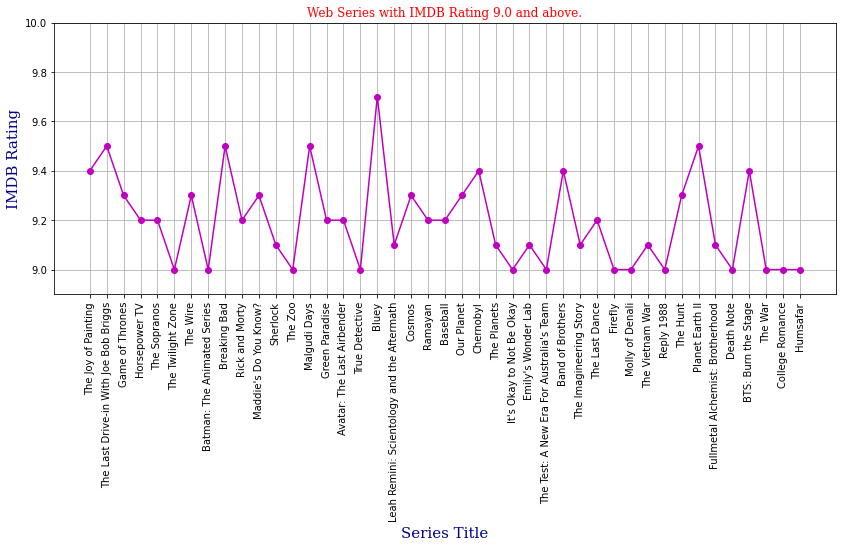

In [110]:

labels = list()
values = list()
for i in range(len(df['IMDB Rating'])):
  if float(df['IMDB Rating'][i]) >= 9.0:
    values = values + [df['IMDB Rating'][i]]
    labels = labels + [df['Series Title'][i]]


plt.figure(figsize=(14,5))
plt.grid()
plt.plot(labels,values,color='m',marker="o")
plt.xticks(rotation=90)
plt.ylim(8.9,10)
plt.tick_params(axis='y', which='major', labelsize=10)
font1 = {'family':'serif','color':'darkblue','size':15}
font2 = {'family':'serif','color':'red','size':12}
plt.xlabel("Series Title", fontdict = font1)
plt.ylabel("IMDB Rating", fontdict = font1)
plt.title("Web Series with IMDB Rating 9.0 and above.", fontdict = font2)
plt.show()


**2. Web Series with *Content Rating* 18+ and *IMDB Rating* 9.0 and above.**

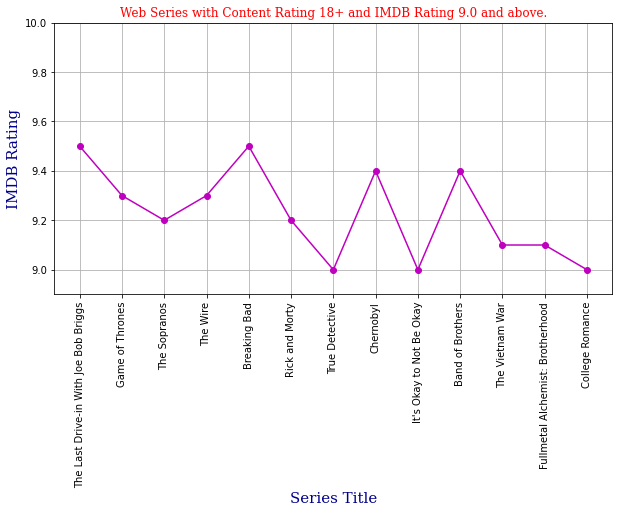

In [61]:
l = list()
cr = df['Content Rating']
for i in range(len(cr)):
  if cr[i] == "all": 
    cr[i] = "0+"
values = list()
cr_new = list()

for i in range(len(cr)):
  cr_new = cr_new + [int(str(cr[i]).split("+")[0])]

df['Content Rating'] = cr_new
for i in range(len(df['Content Rating'])):
  if df['Content Rating'][i] > 16 and float(df['IMDB Rating'][i]) >= 9.0:
    values = values + [df['IMDB Rating'][i]]
    l = l + [df['Series Title'][i]]


plt.figure(figsize=(10,5))
plt.plot(l,values,color="m",marker="o")
plt.ylim(8.9,10)
plt.xticks(rotation=90)
plt.grid()
font1 = {'family':'serif','color':'darkblue','size':15}
font2 = {'family':'serif','color':'red','size':12}
plt.xlabel("Series Title", fontdict = font1)
plt.ylabel("IMDB Rating", fontdict = font1)
plt.title("Web Series with Content Rating 18+ and IMDB Rating 9.0 and above.", fontdict = font2)
plt.show()

  

  


**3. Web Series available for all ages with IMDB Rating 9.0 and above.**

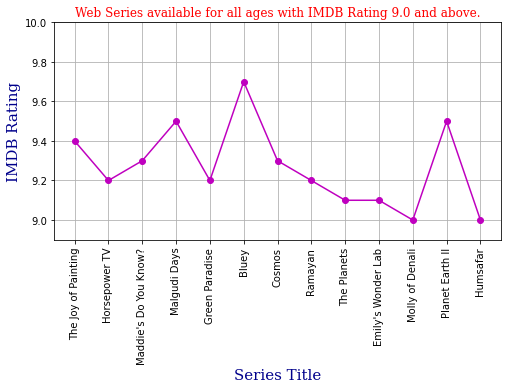

In [60]:
l = list()
values = list()
for i in range(len(df['IMDB Rating'])):
  if df['Content Rating'][i] == 0 and float(df['IMDB Rating'][i]) >= 9.0:
    values = values + [df['IMDB Rating'][i]]
    l = l + [df['Series Title'][i]]

plt.figure(figsize=(8,4))
plt.grid()
plt.plot(l,values,color="m",marker="o")
plt.ylim(8.9,10)
plt.xticks(rotation=90)
font1 = {'family':'serif','color':'darkblue','size':15}
font2 = {'family':'serif','color':'red','size':12}
plt.xlabel("Series Title", fontdict = font1)
plt.ylabel("IMDB Rating", fontdict = font1)
plt.title("Web Series available for all ages with IMDB Rating 9.0 and above.", fontdict = font2)
plt.show()

**4. Latest Web Series with IMDB Rating 9.0 and above.**

In [9]:
df = df.sort_values(by='Year Released', ascending=False)
df.head(10)

,index,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
1451,1598,Love 101,2020,18,7.6,66,"Comedy,Romance",While trying to make their teacher fall for a ...,1Season,Netflix
2286,2707,History 101,2020,7,6.6,60,"History,Documentary",Infographics and archival footage deliver bite...,1Season,Netflix
759,795,Rise of Empires: Ottoman,2020,18,8.0,73,"Documentary,Drama",Ottoman Sultan Mehmed II wages an epic campaig...,1Season,Netflix
752,788,ZeroZeroZero,2020,18,8.2,73,"Crime,Drama",Based on the book of the same name by bestsell...,1 Season,Prime Video
2220,2615,#blackAF,2020,18,6.8,61,"Comedy,Family",A father takes an irreverent and honest approa...,1Season,Netflix
2226,2622,Blood & Water,2020,18,6.2,60,"Drama,2020","After crossing paths at a party, a Cape Town t...",1Season,Netflix
742,778,Kipo and the Age of Wonderbeasts,2020,7,8.3,73,"Animation,Children",A sheltered girl gets a crash course in surviv...,2Seasons,Netflix
5248,7832,A3! Season Spring & Summer,2020,16,6.1,40,"Animation,Drama","In Tokyo, there is a place called Velude Way. ...",1Season,"Hulu,Funimation"
729,765,Dracula,2020,18,6.8,73,"Drama,Horror","Transylvania, 1897. The blood-drinking Count D...",1 Season,Netflix
2249,2660,Twenties,2020,16,5.6,60,"Comedy,2020","Hattie, a queer African American woman, hangs ...",1Season,"Free Services,Showtime,BET"


In [10]:
df.sort_values(by='Year Released')

,index,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
1999,2325,The Three Stooges,1934,0,8.6,62,"Comedy,Animation",The Three Stooges were an American vaudeville ...,26 Seasons,Hulu
647,675,Tom and Jerry,1940,0,8.7,74,"Animation,Comedy",Tom and Jerry is a series of theatrical animat...,6Seasons,HBO MAX
3379,4282,Superman,1941,7,7.4,53,"Action & Adventure,Animation",Superman made his animated debut in this serie...,1Season,DC Universe
4873,7007,Meet the Press,1947,0,5.5,43,"1947,Free Services",Meet the Press is a weekly American television...,82 Seasons,"Free Services,Hulu"
4196,5649,Superman,1948,0,7.0,48,"Action & Adventure,Fantasy",Superman is a 15-part black-and-white Columbia...,1 Season,DC Universe
...,...,...,...,...,...,...,...,...,...,...
5012,7298,Chico Bon Bon: Monkey with a Tool Belt,2020,0,6.4,42,"Animation,Family",STEM children's series focusing on constructio...,2Seasons,Netflix
2009,2338,BNA,2020,16,7.3,62,"Animation,Anime","Morphed into a raccoon beastman, Michiru seeks...",1 Season,Netflix
5020,7316,number24,2020,18,7.1,42,"Animation,Anime",Natsusa Yuzuki entered university expecting to...,1 Season,Funimation
4992,7255,Woodpecker Detective’s Office,2020,16,7.1,42,"Animation,Anime",It is the end of the Meiji Era. The genius poe...,1Season,Free Services


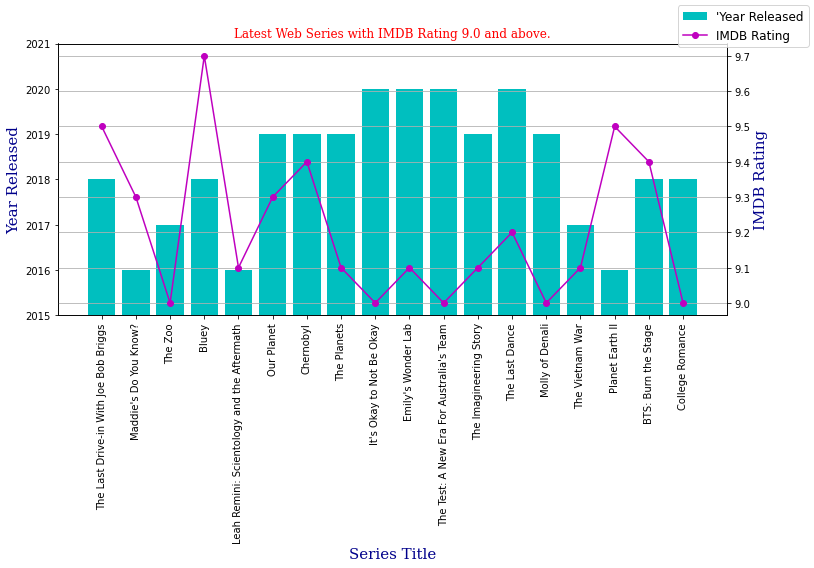

In [88]:

l = list()
values = list()
imdb = list()
for i in range(len(df['Year Released'])):
  if df['IMDB Rating'][i] >= 9.0 and df['Year Released'][i] > 2015:
    values = values + [df['Year Released'][i]]
    l = l + [df['Series Title'][i]]
    imdb = imdb + [df['IMDB Rating'][i]]



fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()
ax1.bar(l,values,color="c",label="'Year Released")
ax2.plot(l,imdb,color="m",marker="o",label="IMDB Rating")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
ax1.set_ylim(2015,2021)
ax2.grid()
font1 = {'family':'serif','color':'darkblue','size':15}
font2 = {'family':'serif','color':'red','size':12}
ax1.set_xlabel("Series Title", fontdict = font1)
ax1.set_ylabel("Year Released", fontdict = font1)
ax2.set_ylabel("IMDB Rating", fontdict = font1)
ax1.set_title("Latest Web Series with IMDB Rating 9.0 and above.", fontdict = font2)
fig.legend(fontsize = 'large')
plt.show()

**5. Web Series with No. of Seasons between 2 and 8 and IMDB Rating 9.0 and above.**

In [12]:
for i in range(len(df['No of Seasons'])):
  df['No of Seasons'][i] = int(df['No of Seasons'][i].split("S")[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
df = df.sort_values(by="No of Seasons", ascending=False)

In [14]:
df.replace(to_replace = -1, value = np.nan , inplace=True)
df.dropna(inplace=True)

df = df.reset_index()

In [15]:
df.shape

(5913, 11)

In [16]:
df['No of Seasons'] = df['No of Seasons'].astype(int)

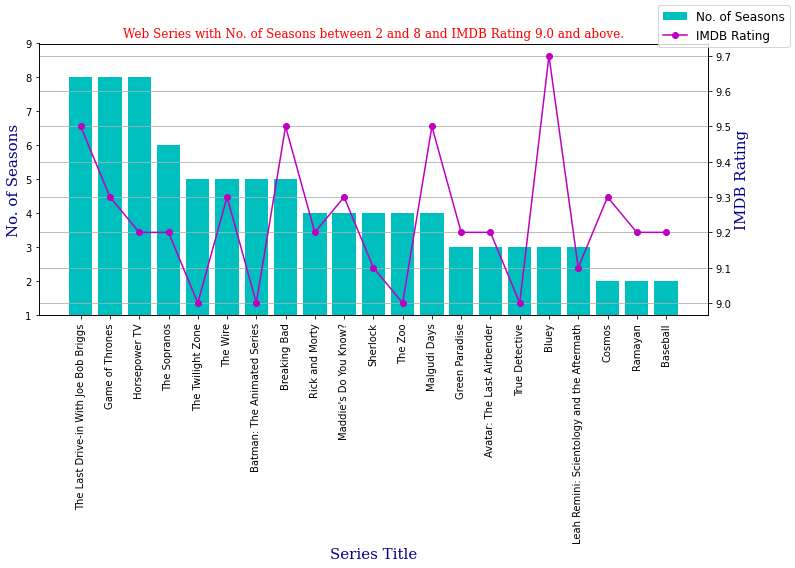

In [89]:
l = list()
values = list()
imdb = list()
for i in range(len(df['No of Seasons'])):
  if df['IMDB Rating'][i] >= 9.0 and df['No of Seasons'][i] > 1 and df['No of Seasons'][i] < 9:
    values = values + [df['No of Seasons'][i]]
    l = l + [df['Series Title'][i]]
    imdb = imdb + [df['IMDB Rating'][i]]



fig, ax1 = plt.subplots(figsize=(12,5))
ax2 = ax1.twinx()
ax1.bar(l,values,color="c",label='No. of Seasons')
ax2.plot(l,imdb,color="m",marker="o",label='IMDB Rating')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
ax1.set_ylim(1,9)
ax2.grid()
font1 = {'family':'serif','color':'darkblue','size':15}
font2 = {'family':'serif','color':'red','size':12}
ax1.set_xlabel("Series Title", fontdict = font1)
ax1.set_ylabel("No. of Seasons", fontdict = font1)
ax2.set_ylabel("IMDB Rating", fontdict = font1)
ax1.set_title("Web Series with No. of Seasons between 2 and 8 and IMDB Rating 9.0 and above.", fontdict = font2)
fig.legend(fontsize = 'large')
plt.show()


**6. Popular Streaming Platforms**

In [18]:
for i in range(len(df['Streaming Platform'])):
  df['Streaming Platform'][i]=df['Streaming Platform'][i].split(",")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
s_plat = (itertools.chain.from_iterable(df['Streaming Platform'])) #Unique Streaming Platforms
c = Counter(s_plat)
k = list()
v = list()
data = list()
for i in c:
  k = k + [i]
  v = v + [c.get(i)]
  data = data + [[i,c.get(i)]]

s_plat_df = pd.DataFrame(data, columns = ['OTT', 'Count'])

s_plat_df = s_plat_df.sort_values(by="Count",ascending=False)

s_plat_df.head(10)

,OTT,Count
0,Free Services,2290
1,Hulu,1247
4,Netflix,1227
3,Prime Video,739
5,fuboTV,688
50,Funimation,417
15,Hoopla,410
10,HBO MAX,325
8,BritBox,185
9,CBS All Access,178


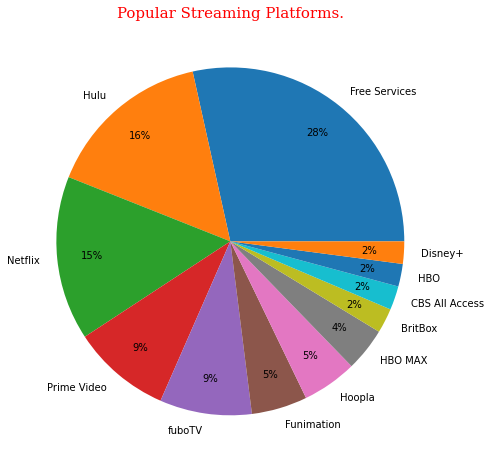

In [109]:
plt.figure(figsize =(8, 8))
plt.pie(s_plat_df['Count'].head(12), labels = s_plat_df['OTT'].head(12), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1)
font2 = {'family':'serif','color':'red','size':15}
plt.title("Popular Streaming Platforms.", fontdict = font2)
plt.show()

**7. Popular Genres.**

In [21]:
for i in range(len(df['Genre'])):
  df['Genre'][i]=df['Genre'][i].split(",")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
gen = (itertools.chain.from_iterable(df['Genre'])) #Unique Streaming Platforms
g = Counter(gen)
k = list()
v = list()
data = list()
for i in g:
  k = k + [i]
  v = v + [g.get(i)]
  data = data + [[i,g.get(i)]]

gen_df = pd.DataFrame(data, columns = ['Genre', 'Count'])

gen_df = gen_df.sort_values(by="Count",ascending=False)


gen_df.head(20)

,Genre,Count
12,Drama,1691
19,Comedy,1488
3,Animation,1391
1,Action & Adventure,1178
7,Documentary,922
0,Reality,720
25,Crime,683
32,Anime,566
4,Children,324
15,Family,317


In [23]:
gen_df.shape

(107, 2)

In [24]:
df.head(5)

,level_0,index,Series Title,Year Released,Content Rating,IMDB Rating,R Rating,Genre,Description,No of Seasons,Streaming Platform
0,1807,2065,House Hunters,1999,0,8.2,63,"[Reality, Action & Adventure]","Hosted by Suzanne Whang, the show takes viewer...",187,"[Free Services, Hulu, HGTV]"
1,2603,3123,House Hunters International,2006,0,7.0,58,"[Reality, Travel]",This spin-off of the wildly popular House Hunt...,160,"[Free Services, Hulu, HGTV]"
2,3046,3762,Mickey Mouse,2013,7,8.1,55,"[Animation, Children]","In this series of cartoon shorts, Mickey Mouse...",84,[Free Services]
3,4873,7007,Meet the Press,1947,0,5.5,43,"[1947, Free Services]",Meet the Press is a weekly American television...,82,"[Free Services, Hulu]"
4,2329,2758,Frontline,1983,18,8.5,60,"[Documentary, 1983]","Since it began in 1983, Frontline has been air...",77,[Prime Video]


In [25]:
n = range(1934,2021,1)

for i in n:
  for j in range(len(gen_df['Genre'])):
    if str(i) == gen_df['Genre'][j]:
      gen_df.replace(to_replace = str(i), value = np.nan , inplace=True)
      break

gen_df.dropna(inplace=True)
gen_df = gen_df.reset_index()

gen_df.shape




(44, 3)

In [26]:
gen_df

,index,Genre,Count
0,12,Drama,1691
1,19,Comedy,1488
2,3,Animation,1391
3,1,Action & Adventure,1178
4,7,Documentary,922
5,0,Reality,720
6,25,Crime,683
7,32,Anime,566
8,4,Children,324
9,15,Family,317


In [27]:
for i in s_plat_df['OTT']:
  for j in range(len(gen_df['Genre'])):
    if i == gen_df['Genre'][j]:
      gen_df.replace(to_replace = i, value = np.nan , inplace=True)
      break

gen_df.dropna(inplace=True)
gen_df = gen_df.reset_index()
gen_df.shape


(26, 4)

In [28]:
gen_df

,level_0,index,Genre,Count
0,0,12,Drama,1691
1,1,19,Comedy,1488
2,2,3,Animation,1391
3,3,1,Action & Adventure,1178
4,4,7,Documentary,922
5,5,0,Reality,720
6,6,25,Crime,683
7,7,32,Anime,566
8,8,4,Children,324
9,9,15,Family,317


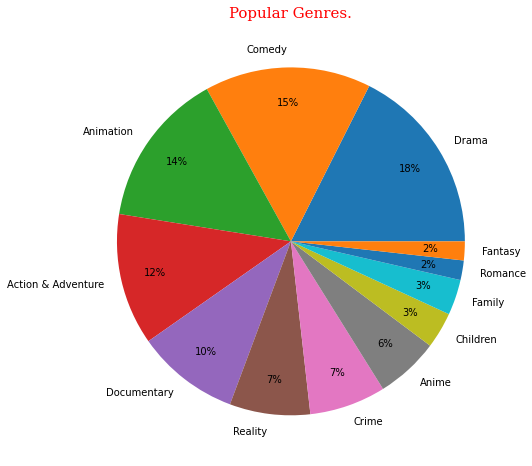

In [107]:
plt.figure(figsize =(8, 8))
plt.pie(gen_df['Count'].head(12), labels = gen_df['Genre'].head(12), autopct='%1.0f%%', pctdistance=0.8, labeldistance=1.1)
font2 = {'family':'serif','color':'red','size':15}
plt.title("Popular Genres.", fontdict = font2)
plt.show()

**8. Web Series available on Netflix with IMDB Rating 9.0 and above.**

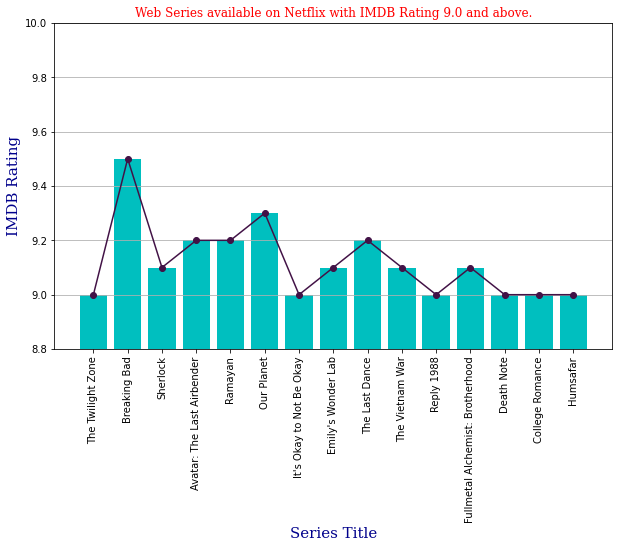

In [74]:

l = list()
v = list()
for i in range(len(df['Streaming Platform'])):
  if "Netflix" in df['Streaming Platform'][i] and df['IMDB Rating'][i] >= 9.0:
    l = l + [df['Series Title'][i]]
    v = v + [df['IMDB Rating'][i]]

plt.figure(figsize=(10,6))
plt.bar(l,v,color="c")
plt.plot(l,v,marker="o",color="#421246")
plt.ylim(8.8,10)
plt.grid(axis="y")
plt.xticks(rotation=90)
font1 = {'family':'serif','color':'darkblue','size':15}
font2 = {'family':'serif','color':'red','size':12}
plt.xlabel("Series Title", fontdict = font1)
plt.ylabel("IMDB Rating", fontdict = font1)
plt.title("Web Series available on Netflix with IMDB Rating 9.0 and above.", fontdict = font2)
plt.show()



**9. Average IMDB Rating grouped by Genre.**


In [31]:
l = list()
v = list()

data_avg = list()
for i in range(len(gen_df['Genre'])):
  imdb_sum = 0.0
  c = 0
  for j in range(len(df['Genre'])):
    if gen_df['Genre'][i] in df['Genre'][j]:
      imdb_sum = imdb_sum + df['IMDB Rating'][j]
      c = c + 1
  data_avg = data_avg + [[gen_df['Genre'][i],(imdb_sum/c),c]]

gen_avg_df = pd.DataFrame(data_avg, columns = ['Genre', 'Avg_IMDB','T_Count'])
gen_avg_df = gen_avg_df.sort_values(by="T_Count",ascending=False)


gen_avg_df

,Genre,Avg_IMDB,T_Count
0,Drama,7.312123,1691
1,Comedy,7.068481,1488
2,Animation,6.874335,1391
3,Action & Adventure,7.081664,1178
4,Documentary,7.277983,922
5,Reality,6.410694,720
6,Crime,7.406442,683
7,Anime,7.206537,566
8,Children,6.685494,324
9,Family,6.833438,317


In [32]:
gen_avg_df.shape

(26, 3)

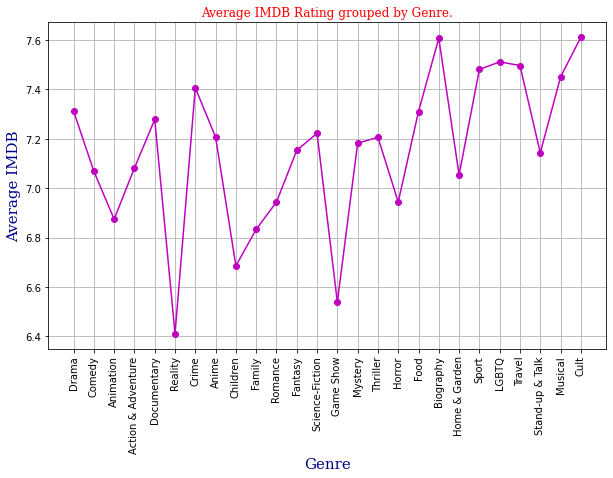

In [76]:
labels = gen_avg_df['Genre']
values = gen_avg_df['Avg_IMDB']


plt.figure(figsize=(10,6))
plt.plot(labels,values,color="m",marker="o")
plt.xticks(rotation=90)
plt.grid()
font1 = {'family':'serif','color':'darkblue','size':15}
font2 = {'family':'serif','color':'red','size':12}
plt.xlabel("Genre", fontdict = font1)
plt.ylabel("Average IMDB", fontdict = font1)
plt.title("Average IMDB Rating grouped by Genre.", fontdict = font2)
plt.show()
